# Dinamikai rendszerek 2019/2020 EF

## Példák
-----

Ebben a notebookban bemutatunk pár egyszerű példát ami segíthet a feladatlapok megoldásában.
A fájlt időről-időre **frissítjük** új példákkal. (Keress rá a laborok dátumaira)

## 2019/10/10

### Függvények

In [3]:
function func(x)
    return x*sin(x)
end

func (generic function with 1 method)

Függvény alkalmazása tömb minden elemére:
```julia
func.(array)
```
A függvény neve után pontot kell tenni.

In [4]:
x=1:0.01:50;

func.(x) 

4901-element Array{Float64,1}:
   0.8414709848078965
   0.8553001630641953
   0.8691501823883503
   0.8830179588642615
   0.896900396333072 
   0.9107943868737178
   0.9246968112856855
   0.9386045395739094
   0.9525144314357433
   0.9664233367499412
   0.9803280960675791
   0.994225541104853 
   1.0081124952376859
   ⋮                 
 -18.29573148230491  
 -17.83425640081835  
 -17.37081112137878  
 -16.905441282690852 
 -16.438192734663645 
 -15.969111533892395 
 -15.498243939120627 
 -15.025636406680249 
 -14.551335585906939 
 -14.075388314537694 
 -13.597841614085615 
 -13.118742685196437 

### Grafikonok készítése

 Első alkalommal szükséges a `Plots` csomag telepítése is: 
 ```julia
 using Pkg; Pkg.add("Plots")
 ```


In [ ]:
using Pkg; Pkg.add("Plots")

In [1]:
using Plots #importaljuk a Plots csomagot

Ábrázolom a függvényemet:

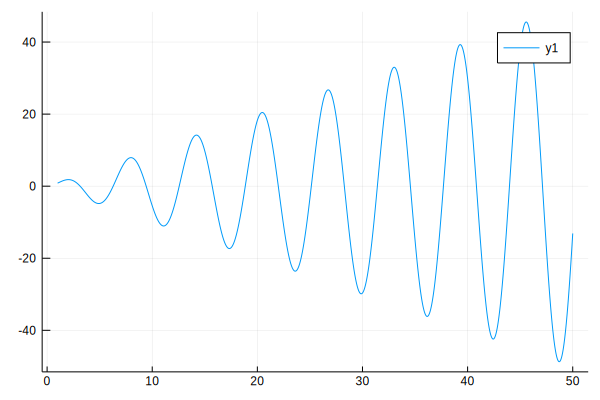

In [6]:
plot(x,func.(x))

Formázással "érthetővé" tesszük a grafikont. **Ezt a feladatlapokban is el kell végezni!**

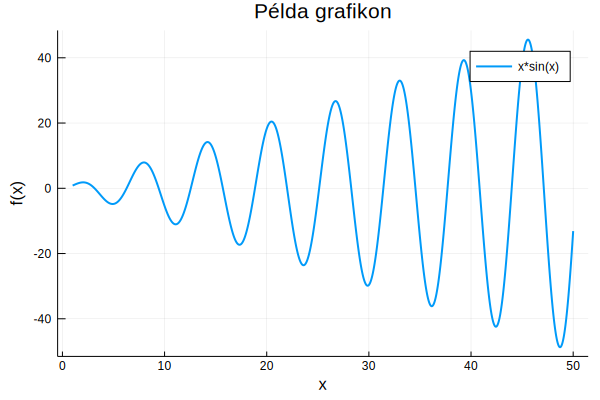

In [7]:
plot(x,func.(x),lw=2,xlabel="x",ylabel="f(x)",label="x*sin(x)",title="Példa grafikon")

Haladó szint. A formázást egy szinttel tovább vihetjük a LaTeX segítségével:

In [8]:
using Pkg; Pkg.add("LaTeXStrings") #ezt csak eloszor kell elvegezni

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %0 %.8 %                         ]  35.6 % [====================>                    ]  49.5 %>           ]  71.0 %==================================>      ]  84.9 %>]  98.6 % Resolving package versions...
 Installed DataAPI ────────────── v1.1.0
 Installed Missings ───────────── v0.4.3
 Installed BlockBandedMatrices ── v0.5.1
 Installed BandedMatrices ─────── v0.12.3
 Installed MatrixFactorizations ─ v0.2.0
 Installed CategoricalArrays ──── v0.7.1
 Installed PlotUtils ──────────── v0.6.0
 Installed PlotlyJS ───────────── v0.13.0
 Installed NLSolversBase ──────── v7.5.0
 Installed DocStringExtensions ── v0.8.1
 Installed DiffEqBase ─────────── v6.3.4
 Installed BlockArrays ────────── v0.10.0
 Installed LazyArrays ─────────── v0.12.2
 Installed PlotlyBase ─────────── v0.3.0
 Installed DataStructures ───

In [9]:
Pkg.add("LaTeXStrings")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [10]:
using LaTeXStrings #importaljuk a LaTeXString csomagot

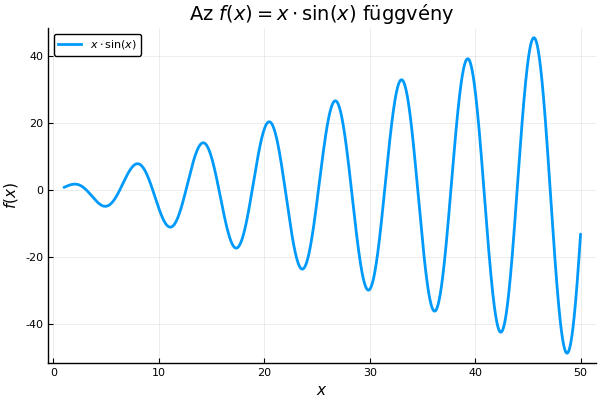

In [11]:
pyplot(); plot(x,func.(x),lw=2,
    xlabel=L"x",ylabel=L"$f(x)$",label=L"$x\cdot \sin(x)$",title=L"Az $f(x)=x\cdot \sin(x)$ függvény")

A LaTeX ismerete nem kötelező, de érdemes megtanulni.

Ha több függvényt akarunk egy ábrára tenni akkor a `plot!()` parancsot kell alkalmazni.

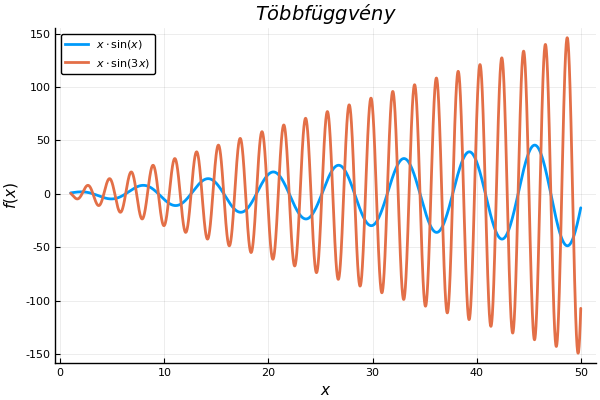

In [8]:
plot!(x,func.(3 .*x),lw=2,label=L"$x\cdot \sin(3x)$",title=L"Több függvény")

A tengelyeket áthelyezhetjük középre:

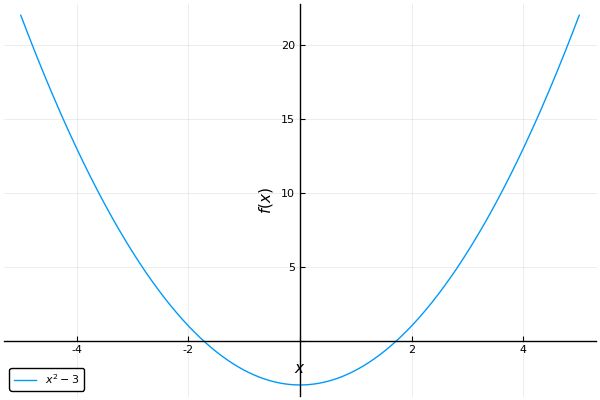

In [34]:
plot(-5:0.01:5.,(-5:0.01:5.).^2 .-3,framestyle= :origin,label=L"$x^2-3$",xlabel=L"x",ylabel=L"f(x)")

Illetve lehet logaritmikus skálán is ábrázolni:

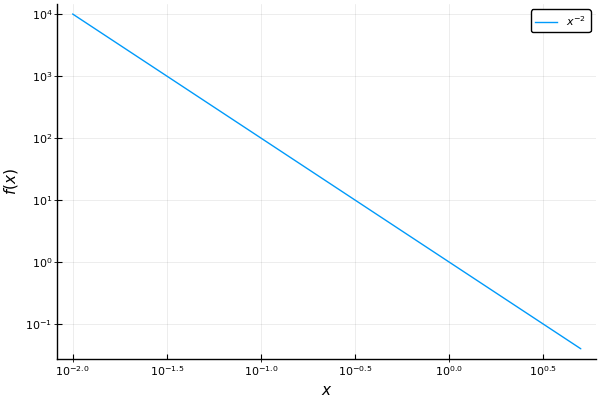

In [36]:
plot(0.01:0.01:5.,(0.01:0.01:5.).^(-2),label=L"$x^{-2}$",xlabel=L"x",ylabel=L"f(x)",xaxis= :log,yaxis= :log)

## 2019/10/17

## Grafikonok 2
### Színek, tengelyek 'linestyle' stb.

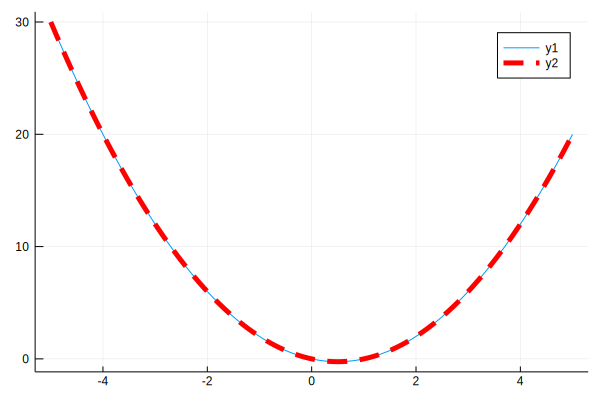

In [2]:
x=-5:0.01:5;
#egyszeru abrazolas:
plot(x,x.^2 .-x);
#formazom a vonalat
plot!(x,x.^2 .-x,linestyle= :dash, linecolor= :red, linewidth=5)


###  Ábrázolás `for` ciklusban

Ábrázoljuk az $x^n$ függvényt különböző $n$-re:

In [72]:
n=[0,1,2,3,4]; #ezek lesznek az indexeim
x=-2:0.01:2;
plot(); #egy ures plotot csinalok

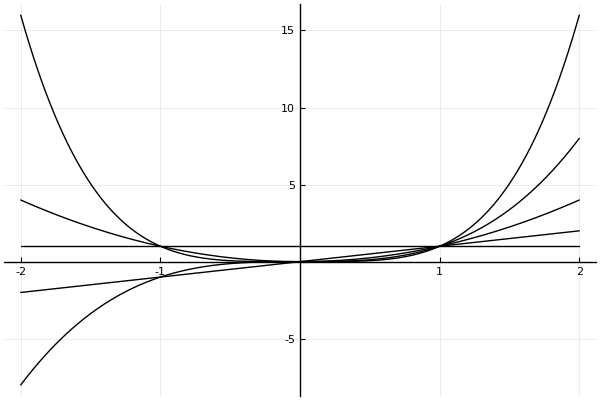

In [73]:
#ellentétben a C-vel például, itt a ciklusváltozó lehet maga a tömb eleme is. nem kell indexekkel hivatkozni ra
for i in n
    p=plot!(x,x.^i,linecolor= :black, legend=false,framestyle= :origin);
    # ugyanazt a szint hasznalom hogy ne legyen tul tarka az abra
end
display(p)
#ezzel jelenitem meg a plot-ok eredmenyeit kulonben nem lesz lathat a ciklus miatt
    

Egy másik példa a `plot` és a ciklusok használatára: az $e^x$ megközelítése hatványsorokkal.

In [68]:
n=[0,1,2,3,4];
x=-3:0.01:3;
using LaTeXStrings; pyplot()

plot(x,exp.(x),label=L"$e^x$",framestyle= :origin, linewidth=3, linecolor= :black,ylims=(0,10));
#ylims=(a,b) - az Y tengely hatarit allitja be

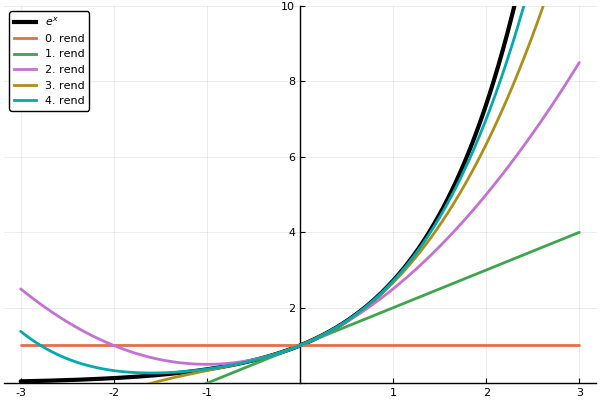

In [69]:

for i in n
    y=x.*0
    j=0
    while j<=i
        y=y+(x.^j)./factorial(j)
        j=j+1
    end
    p=plot!(x,y,label="$(j-1). rend",lw=2)
end
display(p)        